In [4]:
# Load general utilities
# ----------------------
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pickle
import time
import seaborn as sns
import os

# Load sklearn utilities
# ----------------------
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score, precision_score, classification_report,recall_score, roc_auc_score, roc_curve, brier_score_loss, f1_score,mean_squared_error, r2_score


from sklearn.calibration import calibration_curve

# Load classifiers
# ----------------
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV

# Load debugger, if required
#import pixiedust
pd.options.mode.chained_assignment = None #'warn'

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt
from sklearn import metrics   

In [6]:
pd.options.display.max_columns = None

In [7]:
import warnings
warnings.filterwarnings("ignore")

## Importing and preparing data

In [8]:
df = pd.read_csv("creditcard.csv")

In [9]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
df.shape

(284807, 31)

In [11]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
df = df.drop_duplicates()

In [13]:
df = df.dropna()    # Dropping the missing values.


<Axes: xlabel='Amount'>

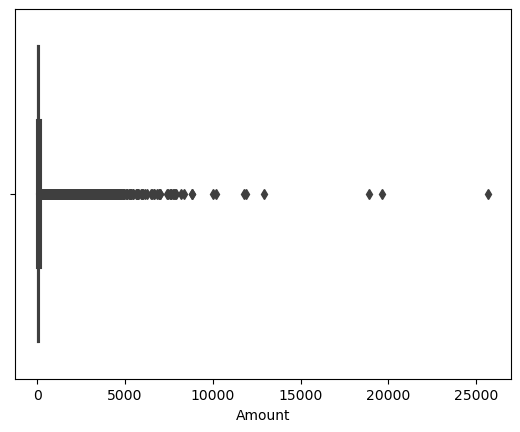

In [14]:
sns.boxplot(x=df['Amount'])

<Axes: xlabel='Class'>

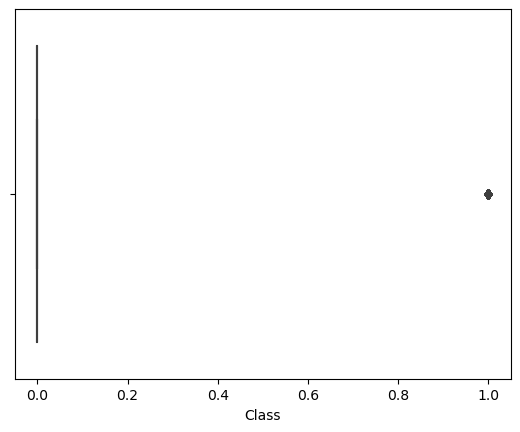

In [15]:
sns.boxplot(x=df['Class'])

## Handling Outliers

In [16]:
n_rows = len(df)
df = df[df.Amount < 500]
print("Removed " + str(n_rows - len(df)) + " rows")

Removed 9459 rows


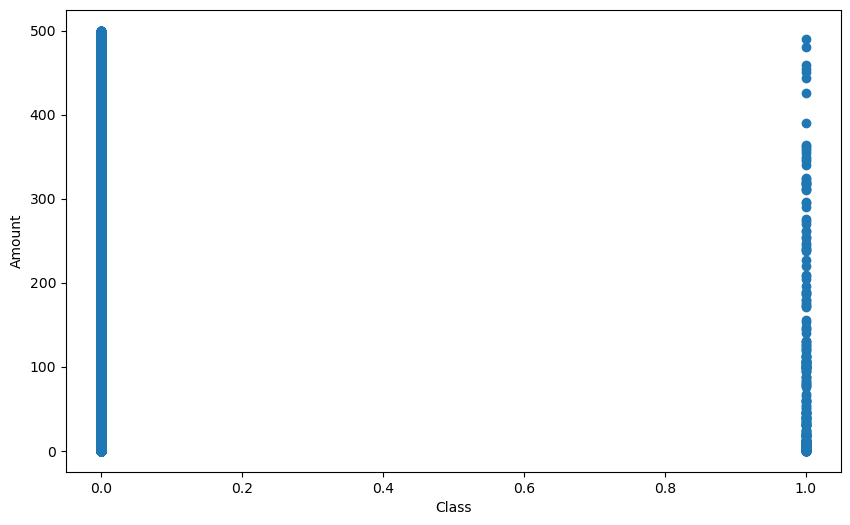

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Class'], df['Amount'])
ax.set_xlabel('Class')
ax.set_ylabel('Amount')
plt.show()

#### The Majority Class is 0 (non-fraud transactions) and the Minority class is 1 (fraud transactions, which we are trying to find)

In [18]:
fraud=df[df['Class']==1]
non_fraud=df[df['Class']==0]

In [19]:
fraud.shape

(439, 31)

In [20]:
non_fraud.shape

(273828, 31)

In [21]:
df.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0
mean,94875.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,56.0,0.0
std,47506.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,84.0,0.0
min,0.0,-47.0,-47.0,-34.0,-6.0,-24.0,-23.0,-44.0,-51.0,-13.0,-25.0,-5.0,-19.0,-4.0,-19.0,-4.0,-14.0,-25.0,-9.0,-5.0,-23.0,-23.0,-9.0,-37.0,-3.0,-7.0,-2.0,-23.0,-12.0,0.0,0.0
25%,54314.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-0.0,-1.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,5.0,0.0
50%,84799.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,20.0,0.0
75%,139371.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0
max,172792.0,2.0,22.0,9.0,13.0,34.0,12.0,16.0,20.0,16.0,24.0,12.0,5.0,5.0,8.0,6.0,6.0,9.0,4.0,6.0,11.0,27.0,8.0,22.0,4.0,8.0,4.0,9.0,23.0,500.0,1.0


In [22]:
y = df["Class"]
X = df.drop("Class", axis=1)

In [23]:
y.mean()

0.001600630042987308

## Standardizing our splits

In [3]:
# to get the same splits each time

kf = KFold(n_splits=5, random_state=None, shuffle=False)

## Standard Approach, No Oversampling

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

rf = RandomForestClassifier(n_estimators=100, random_state=13)

cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')

array([0.78333333, 0.77777778, 0.7704918 , 0.8030303 , 0.78571429])

## Hyperparameter tuning

#### Our goal will be to find a good recall (i.e. we want our classifier to find as many positive cases as it can)

In [53]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

grid_no_up = GridSearchCV(rf, param_grid=params, cv=kf, 
                          scoring='recall').fit(X_train, y_train)

#### The Recall is about 79%

In [54]:
grid_no_up.best_score_

0.7908794029285833

In [55]:
grid_no_up.cv_results_['mean_test_score']

array([0.69890356, 0.70501467, 0.71398292, 0.74246883, 0.73943853,
       0.73961169, 0.7664113 , 0.7661835 , 0.7661835 , 0.7908794 ,
       0.7908794 , 0.77868297])

In [56]:
grid_no_up.best_params_

{'max_depth': 12, 'n_estimators': 50, 'random_state': 13}

#### Checking test scores if it aligns with the CV Scores above (79%)

In [57]:
recall_score(y_test, grid_no_up.predict(X_test))

0.7727272727272727

Almost consistent with the CV results!

## Oversampling - Incorrect Method

Step 1. Oversample the entire training dataset using SMOTE

Step 2. Perform CV using grid search

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)
from imblearn.over_sampling import SMOTE
X_train_upsample, y_train_upsample = SMOTE(random_state=42).fit_resample(X_train, y_train)

Oversampling should give us an even split

In [25]:
y_train_upsample.mean()

0.5

Cross-Validate using Gridsearch

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=13)
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

grid_naive_up = GridSearchCV(rf, param_grid=params, cv=kf, 
                             scoring='recall').fit(X_train_upsample, 
                                                   y_train_upsample)
grid_naive_up.best_score_

0.990876676799186

#### As expected, the Recall is very high!

In [28]:
grid_naive_up.cv_results_['mean_test_score']

array([0.91096752, 0.9105071 , 0.91246648, 0.93940659, 0.94110028,
       0.9391462 , 0.97796135, 0.97993704, 0.98004448, 0.99064773,
       0.98924092, 0.99087668])

In [29]:
grid_naive_up.best_params_

{'max_depth': 12, 'n_estimators': 200, 'random_state': 13}

Evaluate training set as a whole

In [30]:
recall_score(y_train, grid_naive_up.predict(X_train))

0.9817629179331308

Evaluate test set

In [31]:
recall_score(y_test, grid_naive_up.predict(X_test))

0.8818181818181818

#### Recall is 88%, better than 77.27% with no oversampling, but with oversampling, the validation recall was 98.17% which isn't a good measure of the test recall (88%).

## Imbalance pipeline

In [32]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier(n_estimators=100, random_state=13))

imba_pipeline

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=13))])

In [33]:
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)

array([0.8       , 0.81944444, 0.86885246, 0.81818182, 0.81428571])

In [34]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)

In [35]:

grid_imba.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='recall')

In [36]:
grid_imba.cv_results_['mean_test_score'], grid_imba.cv_results_['mean_train_score']

(array([0.86608651, 0.86894365, 0.87172143, 0.8683881 , 0.87180079,
        0.86846746, 0.85150805, 0.85484139, 0.86047631, 0.84186573,
        0.8385324 , 0.8415627 ]),
 array([0.88213678, 0.8828713 , 0.884387  , 0.91411895, 0.917217  ,
        0.91872373, 0.97645642, 0.97878504, 0.9795455 , 0.99012305,
        0.99089525, 0.99089525]))

#### The Recall is 87%

In [37]:
grid_imba.best_score_

0.8718007948335817

In [38]:
grid_imba.best_params_

{'randomforestclassifier__max_depth': 6,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__random_state': 13}

#### Checking test scores if it aligns with the validation score above(87%)

In [39]:
y_test_predict = grid_imba.best_estimator_.predict(X_test)

In [40]:
recall_score(y_test, y_test_predict)

0.8909090909090909

Almost consistent with validation score of 87%

In [41]:
y_test_predict = grid_imba.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [42]:
recall_score(y_test, y_test_predict)

0.8909090909090909

### Confusion Matrix

In [56]:
from sklearn.metrics import precision_recall_curve
target_names = ['Non-Fraud','Fraud']
print(classification_report(y_test,y_test_predict,target_names=target_names,digits=4))
print('Precision Recall: ',precision_recall_curve(y_test,y_test_predict))

              precision    recall  f1-score   support

   Non-Fraud     0.9998    0.9953    0.9975     68457
       Fraud     0.2322    0.8909    0.3684       110

    accuracy                         0.9951     68567
   macro avg     0.6160    0.9431    0.6830     68567
weighted avg     0.9986    0.9951    0.9965     68567

Precision Recall:  (array([0.00160427, 0.23222749, 1.        ]), array([1.        , 0.89090909, 0.        ]), array([0, 1]))


### Features Importance

In [43]:
features_imp = grid_imba.best_estimator_.named_steps['randomforestclassifier'].feature_importances_

In [44]:
features_imp

array([0.00199908, 0.00355664, 0.023058  , 0.04671619, 0.15823081,
       0.00145376, 0.00210339, 0.02503616, 0.00430682, 0.02282795,
       0.15068414, 0.06680293, 0.18450152, 0.00132264, 0.17529676,
       0.00077639, 0.0346696 , 0.06407681, 0.00969592, 0.00365869,
       0.00253606, 0.00655095, 0.00136834, 0.00102603, 0.00082924,
       0.00075925, 0.00085481, 0.00138101, 0.00286465, 0.00105547])

In [45]:
importances = grid_imba.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X_train.columns[0:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 50,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) V12                                                0.184502
 2) V14                                                0.175297
 3) V4                                                 0.158231
 4) V10                                                0.150684
 5) V11                                                0.066803
 6) V17                                                0.064077
 7) V3                                                 0.046716
 8) V16                                                0.034670
 9) V7                                                 0.025036
10) V2                                                 0.023058
11) V9                                                 0.022828
12) V18                                                0.009696
13) V21                                                0.006551
14) V8                                                 0.004307
15) V19                                                0.003659
16) V1                                  

Text(0.5, 1.0, 'Feature Importance')

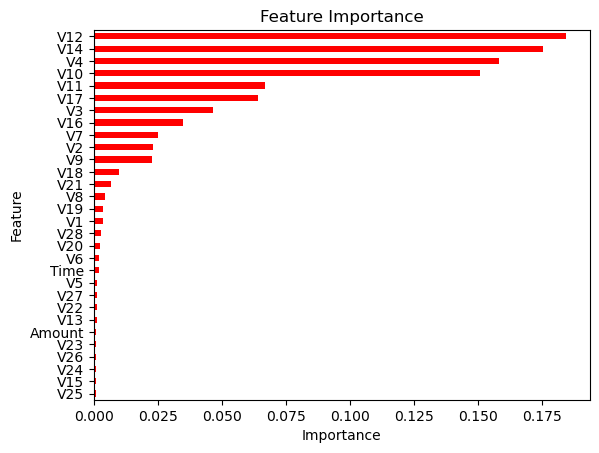

In [48]:
global_importances = pd.Series(importances, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='red')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

### Create a pickle

In [49]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier_dec8.pkl","wb")
pickle.dump(grid_imba, pickle_out)
pickle_out.close()

### Prediction

In [51]:
grid_imba.predict([[1,
-3.0435406239976,
-3.15730712090228,
1.08846277997285,
2.2886436183814,
1.35980512966107,
-1.06482252298131,
0.325574266158614,
-0.0677936531906277,
-0.270952836226548,
-0.838586564582682,
-0.414575448285725,
-0.503140859566824,
0.676501544635863,
-1.69202893305906,
2.00063483909015,
0.666779695901966,
0.599717413841732,
1.72532100745514,
0.283344830149495,
2.10233879259444,
0.661695924845707,
0.435477208966341,
1.37596574254306,
-0.293803152734021,
0.279798031841214,
-0.145361714815161,
-0.252773122530705,
0.0357642251788156,
52900]])

array([0])